# Machine Learning-Analyzing Churn Rate

In this project we will study the different aspects that effect the churn rate of customers in the gym chain "Model Fitness". We will learn to predict the probability of churn (for the upcoming month) for each customer, draw up typical user portraits: select the most outstanding groups and describe their main features and Draw basic conclusions and develop recommendations on how to improve customer service.

<a class="anchor" id="toc"></a>

### Table of Contents

#### 1. [Download the Data](#chapter1)

#### 2. [Exploratory Data Analysis](#chapter2)
* [Missing Values](#section1)
* [Mean Values and Standard Deviation](#section2)
* [Mean Feature Values](#section3)
* [Histograms and Feature Distributions](#section4)

#### 3. [ML Model to predict user churn](#chapter3)
* [Logistic Regression](#section5)
* [Random Forest](#section6)

#### 4. [User clusters](#chapter4)

#### 5. [Conclusions and Recommendations](#chapter5)

In [1]:
# import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt 
import seaborn as sn
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

In [2]:
# ignore warnings
import sys
import warnings
if not sys.warnoptions:
       warnings.simplefilter("ignore")

<a class="anchor" id="chapter1"></a>

### Download the data

In [3]:
# open the data file and read general information
try:
    data = pd.read_csv('gym_churn_us.csv')
except:
    data = pd.read_csv('/datasets/gym_churn_us.csv')

Let's get a general idea about our data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


In [5]:
data.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [6]:
data.tail()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0
3999,1,0,1,0,0,12,1,30,178.861814,12.0,1,1.101832,1.035270,0


We can see we have 4000 customers in total in our dataset. We can also see that all of our data is numerical.

[Back to Table of Contents](#toc)

<a class="anchor" id="chapter2"></a>

### Exploratory Data Analysis

<a class="anchor" id="section1"></a>

#### Missing Values
We can see from the info() function that our data doesn't have any missing values in any of the columns.

[Back to Table of Contents](#toc)

<a class="anchor" id="section2"></a>

#### Mean Values and Standard Deviation

In [7]:
data[
    [
        "Age",
        "Avg_additional_charges_total",
        "Lifetime",
        "Avg_class_frequency_total",
        "Avg_class_frequency_current_month",
    ]
].describe()


,Age,Avg_additional_charges_total,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,29.184250,146.943728,3.724750,1.879020,1.767052
std,3.258367,96.355602,3.749267,0.972245,1.052906
min,18.000000,0.148205,0.000000,0.000000,0.000000
25%,27.000000,68.868830,1.000000,1.180875,0.963003
50%,29.000000,136.220159,3.000000,1.832768,1.719574
75%,31.000000,210.949625,5.000000,2.536078,2.510336
max,41.000000,552.590740,31.000000,6.023668,6.146783


We can see a few things:
1) 'Age' column: The mean and median are pretty close so we can say that the data in this column is not skewed. About 68% of customers are about 26-32 years old.

2) 'Avg_additional_charges_total' column: We can see that the mean is larger then the median so we can say that the data in this column is positivly skewed. This means we might have some small outliers that pull the distribution to the right.

3) 'Lifetime' column: The mean and median are pretty close so we can say that the data is not skewed. About 68% of the customers have accounts for about 0-7 months.

4) 'Avg_class_frequency_total' column: The mean and median are close so we can say that the data is not skewed. About 68% of customers visited the gym about 1-3 times a week over their account lifetime.

5) 'Avg_class_frequency_current_month' column: The mean and median are close so we can say that the data is not skewed. About 68% of customers visited the gym about 1-3 times a week last month.

[Back to Table of Contents](#toc)

<a class="anchor" id="section3"></a>

#### Mean Feature Values

In [8]:
# divide data into customers who left and those who stayed
data.groupby('Churn').mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


We can see a few things:
1) The average age of customers who stayed is higher than the ones who stayed (~30 and ~27).

2) customers who stayed spent on average more money on additional services.

3) Those who stayed, attended more classes per week throughout their account's lifetime.

4) The customers who stayed, attended more classes on average in the last month.

[Back to Table of Contents](#toc)

<a class="anchor" id="section4"></a>

#### Histograms and Feature Distributions

In [9]:
# Get all customers who left
customer_left = data.loc[data['Churn'] == 1].drop('Churn', axis = 1)
customer_left

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
7,0,1,0,0,1,1,0,30,217.786641,1.0,0,1.213502,1.049387
11,1,1,1,0,1,1,0,27,266.783824,1.0,2,2.348535,1.584316
13,1,1,0,0,1,1,1,27,152.748668,1.0,1,0.000000,0.000000
21,0,0,0,0,1,1,0,30,153.198594,1.0,3,0.636382,0.000000
23,1,1,0,0,1,1,1,32,276.079882,1.0,1,1.420637,1.043101
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3982,1,1,0,0,1,1,0,24,135.395712,1.0,0,1.390251,0.789321
3984,1,1,0,0,1,6,1,22,101.107544,6.0,2,1.377860,0.343915
3986,0,1,1,1,1,1,1,34,226.804845,1.0,0,1.399529,0.304130
3994,1,1,0,0,1,1,0,26,31.066721,1.0,1,1.157451,0.269597


In [10]:
# Get all customers who stayed
customer_stayed = data.loc[data['Churn'] == 0].drop('Churn', axis = 1)
customer_stayed

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,0,1,1,0,1,1,0,33,231.778628,1.0,3,1.418791,1.450442
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237


'Age' column:

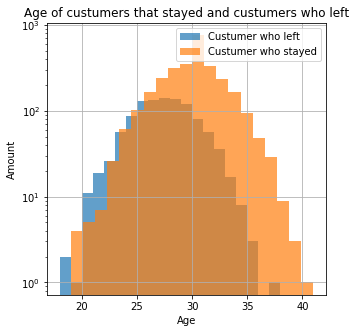

In [11]:
customer_left["Age"].hist(log=True, bins=20, figsize=(5,5), alpha=0.7, label="customer who left");
customer_stayed["Age"].hist(log=True, bins=20, figsize=(5,5), alpha=0.7, label="customer who stayed");
plt.title('Age of customers that stayed and customers who left');
plt.xlabel('Age');
plt.ylabel('Amount');
plt.legend();

We can see that both groups are pretty much normally distributed. (We can see outliers in the customers who left group)

'Avg_additional_charges_total' column:

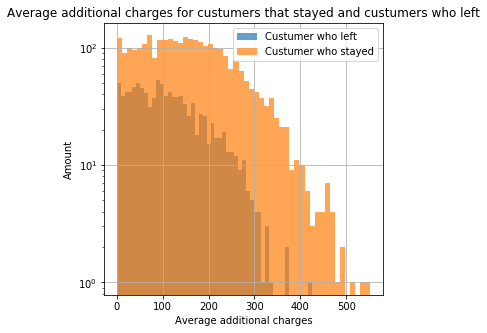

In [12]:
customer_left["Avg_additional_charges_total"].hist(log=True, bins=50, figsize=(5,5), alpha=0.7, label="customer who left");
customer_stayed["Avg_additional_charges_total"].hist(log=True, bins=50, figsize=(5,5), alpha=0.7, label="customer who stayed");
plt.title('Average additional charges for customers that stayed and customers who left');
plt.xlabel('Average additional charges');
plt.ylabel('Amount');
plt.legend();

The distribution of this column is right skewed for both groups. We have outliers in both groups.

'Lifetime' column:

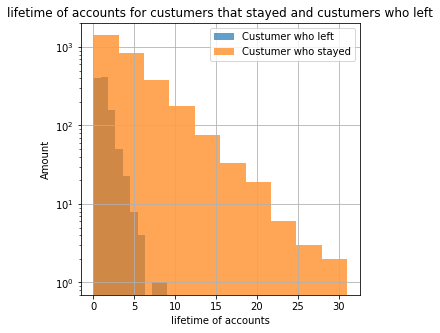

In [13]:
customer_left["Lifetime"].hist(log=True, bins=10, figsize=(5,5), alpha=0.7, label="customer who left");
customer_stayed["Lifetime"].hist(log=True, bins=10, figsize=(5,5), alpha=0.7, label="customer who stayed");
plt.title('lifetime of accounts for customers that stayed and customers who left');
plt.xlabel('lifetime of accounts');
plt.ylabel('Amount');
plt.legend();

Again, we see that the data in this column is right skewed and there are outliers.

'Avg_class_frequency_total' column:

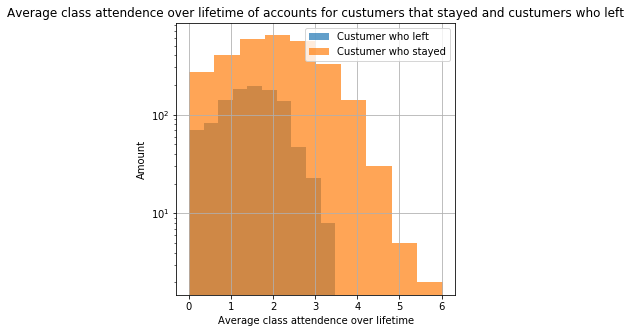

In [14]:
customer_left["Avg_class_frequency_total"].hist(log=True, bins=10, figsize=(5, 5), alpha=0.7, label="customer who left");
customer_stayed["Avg_class_frequency_total"].hist(log=True, bins=10, figsize=(5, 5), alpha=0.7, label="customer who stayed");
plt.title('Average class attendence over lifetime of accounts for customers that stayed and customers who left');
plt.xlabel('Average class attendence over lifetime');
plt.ylabel('Amount');
plt.legend();

Again, we see that the data in this column is right skewed.

'Avg_class_frequency_current_month' column:

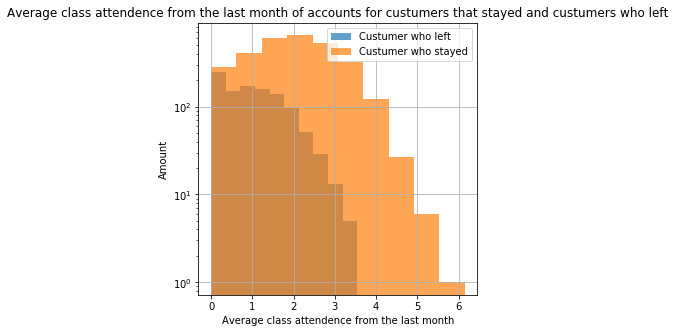

In [15]:
customer_left["Avg_class_frequency_current_month"].hist(log=True, bins=10, figsize=(5, 5), alpha=0.7, label="customer who left");
customer_stayed["Avg_class_frequency_current_month"].hist(log=True, bins=10, figsize=(5, 5), alpha=0.7, label="customer who stayed");
plt.title('Average class attendence from the last month of accounts for customers that stayed and customers who left');
plt.xlabel('Average class attendence from the last month');
plt.ylabel('Amount');
plt.legend();

Again, we see that the data in this column is right skewed.

In [16]:
corr_matrix = data[
    [
        "Age",
        "Avg_additional_charges_total",
        "Lifetime",
        "Avg_class_frequency_total",
        "Avg_class_frequency_current_month",
    ]
].corr()

corr_matrix

,Age,Avg_additional_charges_total,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Age,1.000000,0.080240,0.164693,0.119953,0.183095
Avg_additional_charges_total,0.080240,1.000000,0.079028,0.044426,0.079570
Lifetime,0.164693,0.079028,1.000000,0.112338,0.181975
Avg_class_frequency_total,0.119953,0.044426,0.112338,1.000000,0.952739
Avg_class_frequency_current_month,0.183095,0.079570,0.181975,0.952739,1.000000


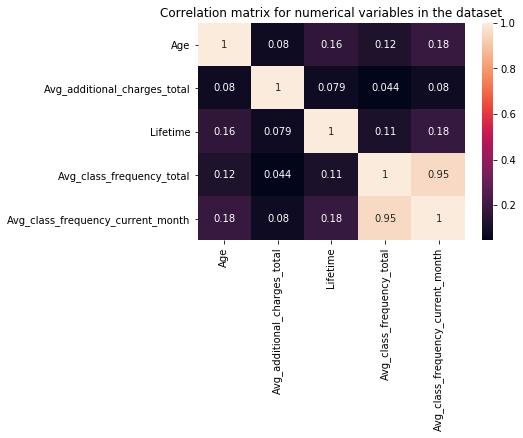

In [17]:
sn.heatmap(corr_matrix, annot=True);
plt.title('Correlation matrix for numerical variables in the dataset');
plt.show();

[Back to Table of Contents](#toc)

<a class="anchor" id="chapter3"></a>

### ML Model to predict user churn

In [18]:
# divide the data into features and a target variable
features = data.drop('Churn', axis = 1)
target = data['Churn']

In [19]:
# divide the data into train and test
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.2, random_state=0
)

[Back to Table of Contents](#toc)

<a class="anchor" id="section5"></a>

#### Logistic Regression:

In [20]:
# define the model's algorithm
LR_model = LogisticRegression(random_state = 0)

In [21]:
# train the model
LR_model.fit(features_train, target_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
# binary prediction
predictions = LR_model.predict(features_valid)

In [23]:
# accuracy, precision, and recall
print('Accuracy for Logistic Regression: {:.2f}'.format(accuracy_score(target_valid, predictions)))
print('Precision for Logistic Regression: {:.2f}'.format(precision_score(target_valid, predictions)))
print('Recall for Logistic Regression: {:.2f}'.format(recall_score(target_valid, predictions)))

Accuracy for Logistic Regression: 0.93
Precision for Logistic Regression: 0.86
Recall for Logistic Regression: 0.83


[Back to Table of Contents](#toc)

<a class="anchor" id="section6"></a>

#### Random Forest:

In [24]:
rf_model = RandomForestClassifier(n_estimators = 2, random_state = 0)

In [25]:
# train the model
rf_model.fit(features_train, target_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=2,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [26]:
# binary prediction
predictions = rf_model.predict(features_valid)

In [27]:
# accuracy, precision, and recall
print('Accuracy for Random Forest: {:.2f}'.format(accuracy_score(target_valid, predictions)))
print('Precision for Random Forest: {:.2f}'.format(precision_score(target_valid, predictions)))
print('Recall for Random Forest: {:.2f}'.format(recall_score(target_valid, predictions)))

Accuracy for Random Forest: 0.88
Precision for Random Forest: 0.86
Recall for Random Forest: 0.64


Accuracy is better in the Logistic Regression model (93% vs. 88%)

Precision is the same in both models (86%)

Recal is better in the Logistic Regression model (83% vs. 64%)

Overall the Accuracy of the Logistic Regression model is the best classification metric.

[Back to Table of Contents](#toc)

<a class="anchor" id="chapter4"></a>

### User Clusters

#### Standardize the data

In [28]:
# creating a scaler class object
scaler = StandardScaler()

In [29]:
# training standardizer
features_sc = scaler.fit_transform(features)

#### Build a matrix of distances based on the standardized feature matrix and plot a dendrogram

In [30]:
# create table with the linked bundles of objects
linked = linkage(features_sc, method = 'ward')

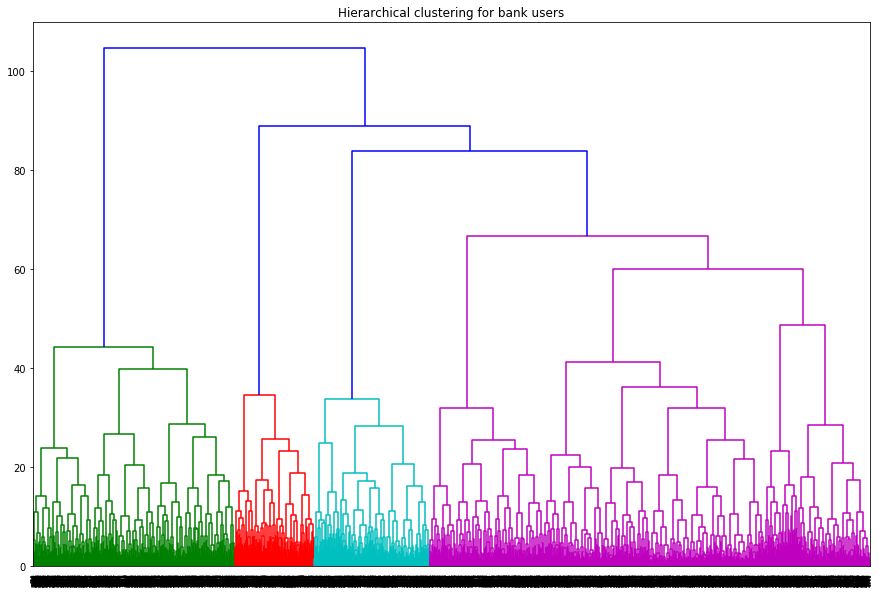

In [31]:
# plot a dendrogram
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchical clustering for bank users')
plt.show()

Based on the 5 different colors of the dendogram we will set the number of clusters as '5'.

#### Train the clustering model with the K-means algorithm and predict customer clusters

In [32]:
# define the k_means model with 5 clusters
km = KMeans(n_clusters = 5, random_state = 12345)

In [33]:
# predict the clusters for observations
labels = km.fit_predict(features_sc)

#### Look at the mean feature values for clusters

In [34]:
# store cluster labels in the field of our dataset
data['cluster_km'] = labels

In [35]:
# get the statistics of the mean feature values per cluster
grouped = data.groupby('cluster_km').mean().reset_index()

In [36]:
grouped

,cluster_km,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,0,0.500960,0.000000,0.464491,0.078695,1.0,2.343570,0.216891,28.579655,136.561586,2.197697,2.905950,1.738534,1.562870,0.429942
1,1,0.498361,0.951913,0.738798,0.463388,1.0,11.547541,0.542077,29.948634,166.092391,10.488525,4.778142,2.112522,2.105463,0.019672
2,2,0.519319,1.000000,0.224623,0.000000,1.0,2.056974,0.379175,28.918140,141.863877,1.963982,3.309758,1.808608,1.655857,0.362148
3,3,0.523316,0.862694,0.471503,0.305699,0.0,4.777202,0.427461,29.297927,144.208179,4.466321,3.940415,1.854211,1.723967,0.266839
4,4,0.505376,0.998464,0.774194,1.000000,1.0,3.000000,0.454685,29.150538,141.876021,2.804916,3.745008,1.843126,1.741179,0.250384


We can see that the 'Gender' and ' Age' are the only 2 columns that have relatively close mean values across clusters. All other columns have quite a wide range of mean values.

#### Plot distributions of features for the clusters

Let's look at the unique values that each column has in our data

In [37]:
data.nunique()

gender                                  2
Near_Location                           2
Partner                                 2
Promo_friends                           2
Phone                                   2
Contract_period                         3
Group_visits                            2
Age                                    23
Avg_additional_charges_total         4000
Month_to_end_contract                  12
Lifetime                               29
Avg_class_frequency_total            3913
Avg_class_frequency_current_month    3820
Churn                                   2
cluster_km                              5
dtype: int64

We can see that most of our columns have a limited set of values. For those columns we will plot histograms to show the distributions of features for the clusters. For the columns that have more than 3 unique values we'll plot bar plots to show the distributions of features for the clusters.

In [38]:
# function to plot histograms
def show_clusters_on_hist(df, column, cluster_name):
    print("\033[1m" + column + " per cluster" + "\033[0m")
    sn.catplot(column, col=cluster_name, col_wrap=4,
                data=df,
                kind="count", height=3.5, aspect=.8, 
                palette='tab20')

In [39]:
# function to plot boxplots
def show_clusters_on_boxplot(df, column, cluster_name):
    plt.figure(figsize = (8,8))
    sn.boxplot(x = cluster_name, y = column, data = df, hue = cluster_name)
    plt.title('{} per cluster'.format(column))
    plt.show()

gender per cluster


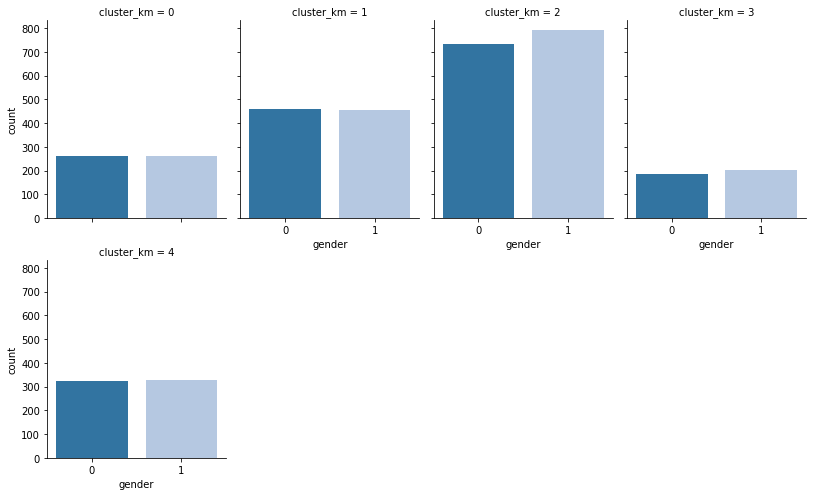

In [40]:
# plot 'Gender' column
show_clusters_on_hist(data, 'gender', 'cluster_km')

We can see that in terms of the 'Gender' columns, the clusters are mostly balanced.

Near_Location per cluster


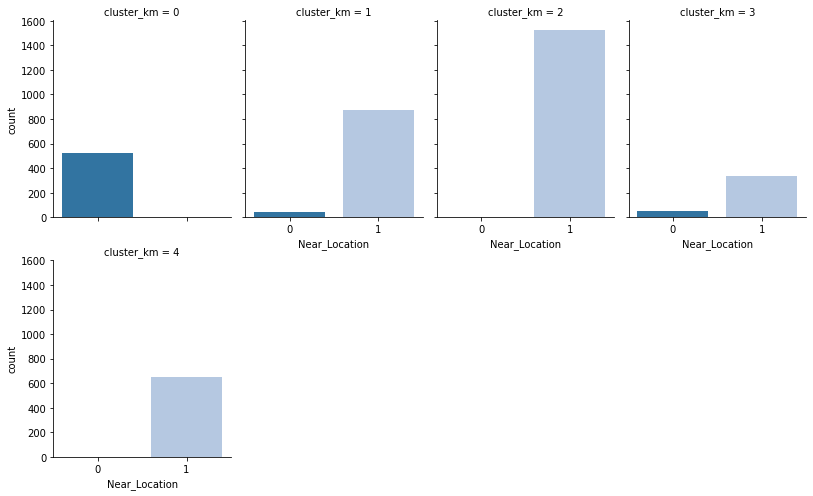

In [41]:
# plot 'Near_Location' column
show_clusters_on_hist(data, 'Near_Location', 'cluster_km')

We can see that the clusters are not balanced at all and most of the clusters have customers who lives or works in the neighborhood where the gym is located.

Partner per cluster


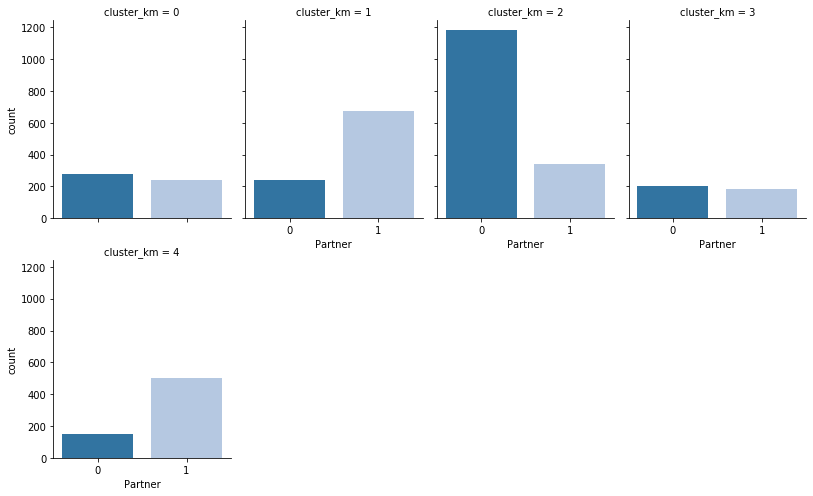

In [42]:
# plot 'Partner' column
show_clusters_on_hist(data, 'Partner', 'cluster_km')

We can see there are some balanced clusters, some clusters have more customers who are employees of partner companies and some clusters have more customers who are not employees of partner companies.

Promo_friends per cluster


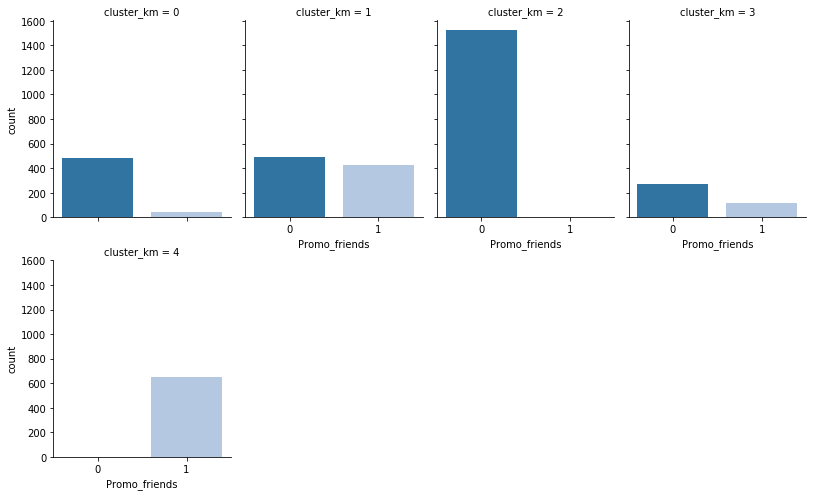

In [43]:
# plot 'Promo_friends' column
show_clusters_on_hist(data, 'Promo_friends', 'cluster_km')

In this column, like in the 'Partner' column, we can see that the clusters vary. Some clusters have more customers who originally signed up through a "bring a friend" offer and other clusters have less customers who originally signed up through a "bring a friend" offer.

Phone per cluster


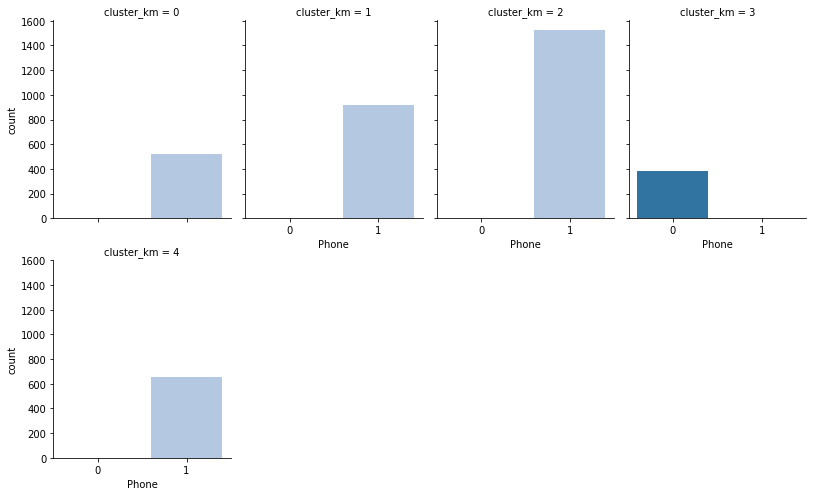

In [44]:
# plot 'Phone' column
show_clusters_on_hist(data, 'Phone', 'cluster_km')

We can see that mostly all customers provided a phone number when sugning in (except in cluster 1 where most customers did not provide a phone number).

Contract_period per cluster


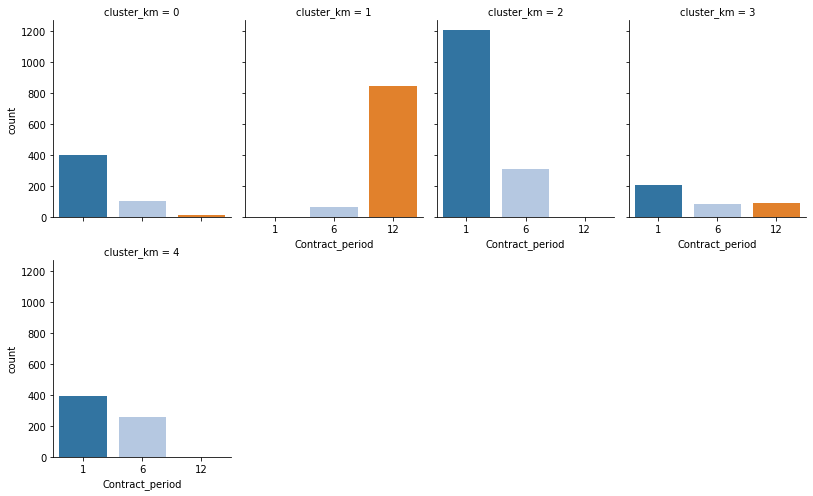

In [45]:
# plot 'Contract_period' column
show_clusters_on_hist(data, 'Contract_period', 'cluster_km')

We can see that the data varies between clusters. Some clusters have more contracts for 1 month, some for 12 months. We can see that there are no clustres in which customers have a contract for 3 months.

Group_visits per cluster


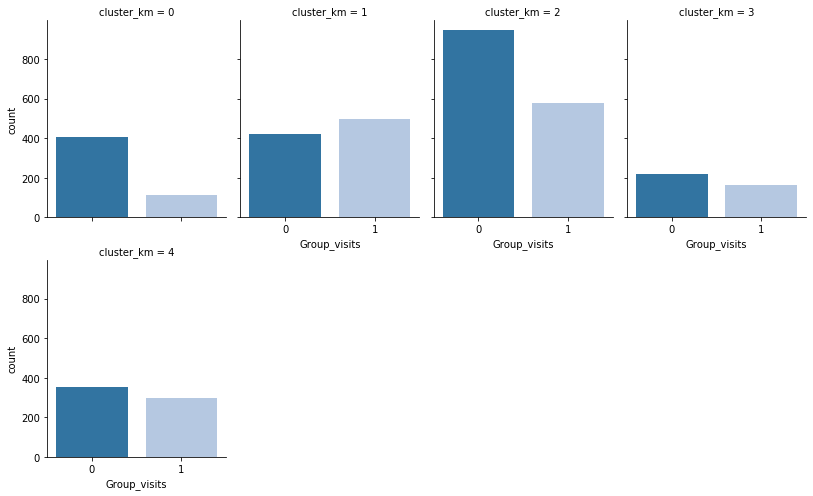

In [46]:
# plot 'Group_visits' column
show_clusters_on_hist(data, 'Group_visits', 'cluster_km')

Like we saw in other features, some clusters have more customers who participated in group sessions and some have more customers who did not participate in group sessions.

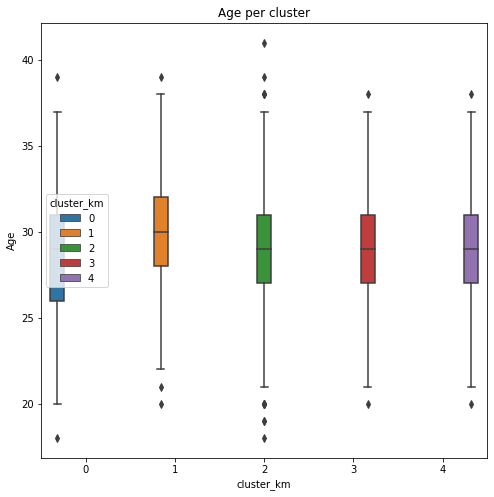

In [47]:
# plot 'Age' column
show_clusters_on_boxplot(data, 'Age', 'cluster_km')

We can see we have some outliers in all clusters, but mostly the average age is very close.

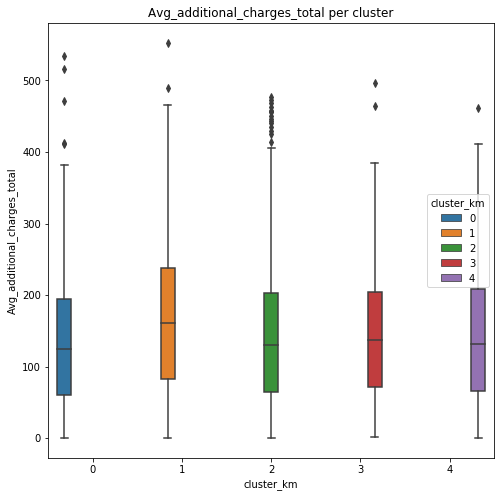

In [48]:
# plot 'Avg_additional_charges_total' column
show_clusters_on_boxplot(data, 'Avg_additional_charges_total', 'cluster_km')

Again, the average additional charges is pretty close in all clusters. We have outliers in all clusters.

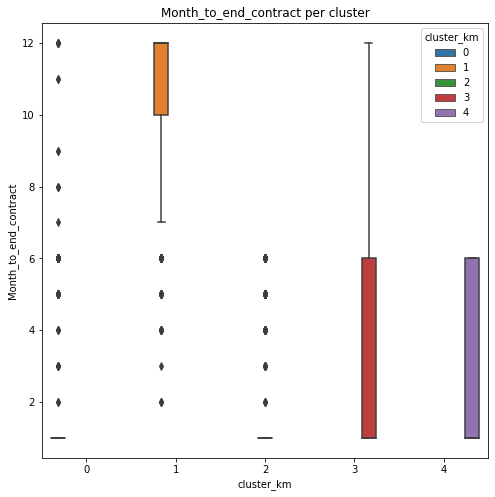

In [49]:
# plot 'Month_to_end_contract' column
show_clusters_on_boxplot(data, 'Month_to_end_contract', 'cluster_km')

We can see that there isn't an even distribution of months until the end of the contract for customers in the clusters.

#### Calculate the churn rate for each cluster

We actually already calculated the churn rate when we calculated the mean values for clusters, we will just convert it to precent.

In [50]:
# save churn rates in a new dataset
churn_rate = grouped[['cluster_km','Churn']]
churn_rate

,cluster_km,Churn
0,0,0.429942
1,1,0.019672
2,2,0.362148
3,3,0.266839
4,4,0.250384


In [51]:
churn_rate['Churn'] = churn_rate['Churn'] * 100
churn_rate.rename(columns={'Churn': 'churn_%'}, inplace=True)
churn_rate

,cluster_km,churn_%
0,0,42.994242
1,1,1.967213
2,2,36.214800
3,3,26.683938
4,4,25.038402


Let's sort the churn rate in ascending order to clearly see which clusters are most prone to leaving

In [52]:
churn_rate.sort_values('churn_%', inplace = True)
churn_rate

,cluster_km,churn_%
1,1,1.967213
4,4,25.038402
3,3,26.683938
2,2,36.214800
0,0,42.994242


We can see that the second cluster has a high churn rate and is the most prone to leaving, while the third cluster has a low churn rate and is the most prone to staying. The fifth cluster has the second lowest churn rate, and the first and fourth clusters have a similiar churn rate.

[Back to Table of Contents](#toc)

<a class="anchor" id="chapter5"></a>

### Conclusions and Recommendations

In this project we studied the missing values, distribution of data in the columns, mean values for customers who left and for those who stayed,found that overall the Accuracy of the Logistic Regression model is the best classification metric, created user clusters and looked at the mean feature values and the churn rate for each cluster.

In [53]:
# look at the third cluster
grouped.loc[2]

cluster_km                             2.000000
gender                                 0.519319
Near_Location                          1.000000
Partner                                0.224623
Promo_friends                          0.000000
Phone                                  1.000000
Contract_period                        2.056974
Group_visits                           0.379175
Age                                   28.918140
Avg_additional_charges_total         141.863877
Month_to_end_contract                  1.963982
Lifetime                               3.309758
Avg_class_frequency_total              1.808608
Avg_class_frequency_current_month      1.655857
Churn                                  0.362148
Name: 2, dtype: float64

When looking at the third cluster (which has the highest staying rate from all 5 clusters), we can see that the customers are characterized by-
1) Living or working in the neighborhood where the gym is located

2) Being an employee of a partner company

3) Having a 1 year contract

4) Being ~30 years old

5) Coming to a class consistently twice a week

From this analysis of the cluster of customers that stays, these are my recommendation:
1) Target companies in the area with deals on 1 year contracts, which should lure customers that fit the profile of a customer that doesn't churn.

2) Contact the companies in the area and partner with them to have more access to customers who fit the profile.

3) Have marketing that appeals more to ~30 year olds.

4) Market classes that have a frequency of at least twice a week.